In [1]:
import scanpy as sc
import scFates as scf
import warnings
warnings.filterwarnings("ignore")

In [2]:
adata = sc.read("adata_tree.h5ad")

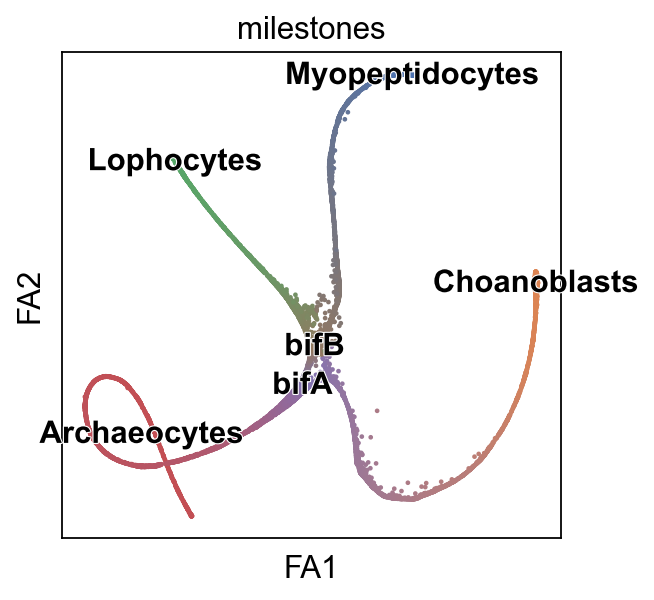

In [46]:
sc.set_figure_params()
scf.pl.milestones(adata,annotate=True)

In [95]:
root="Archaeocytes"
miles=["Myopeptidocytes","Lophocytes"]

In [37]:
scf.tl.test_fork(adata,root,miles,n_jobs=40,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 3226/3226 [01:14<00:00, 43.48it/s]
    test for upregulation for each leave vs root
    upreg Lophocytes: 100%|██████████| 1939/1939 [00:04<00:00, 413.06it/s]
    finished (0:01:23) --> added 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['fork'], DataFrame with fork test results.


In [38]:
scf.tl.branch_specific(adata,root,miles,effect=1)

    branch specific features: Myopeptidocytes: 89, Lophocytes: 60
    finished --> updated 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['fork'], DataFrame updated with additionnal 'branch' column.


In [96]:
scf.tl.activation(adata,root,miles,pseudotime_offset=0,n_jobs=40,n_map=100)

testing activation
    mapping: 100%|██████████| 100/100 [04:07<00:00,  2.48s/it]
    threshold pseudotime is: 2.383585045805539
    17 early and 72 late features specific to leave Myopeptidocytes
    3 early and 57 late features specific to leave Lophocytes
    finished (0:04:07) --> updated 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:59<00:00,  1.69it/s]
    finished (0:02:11) --> added 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


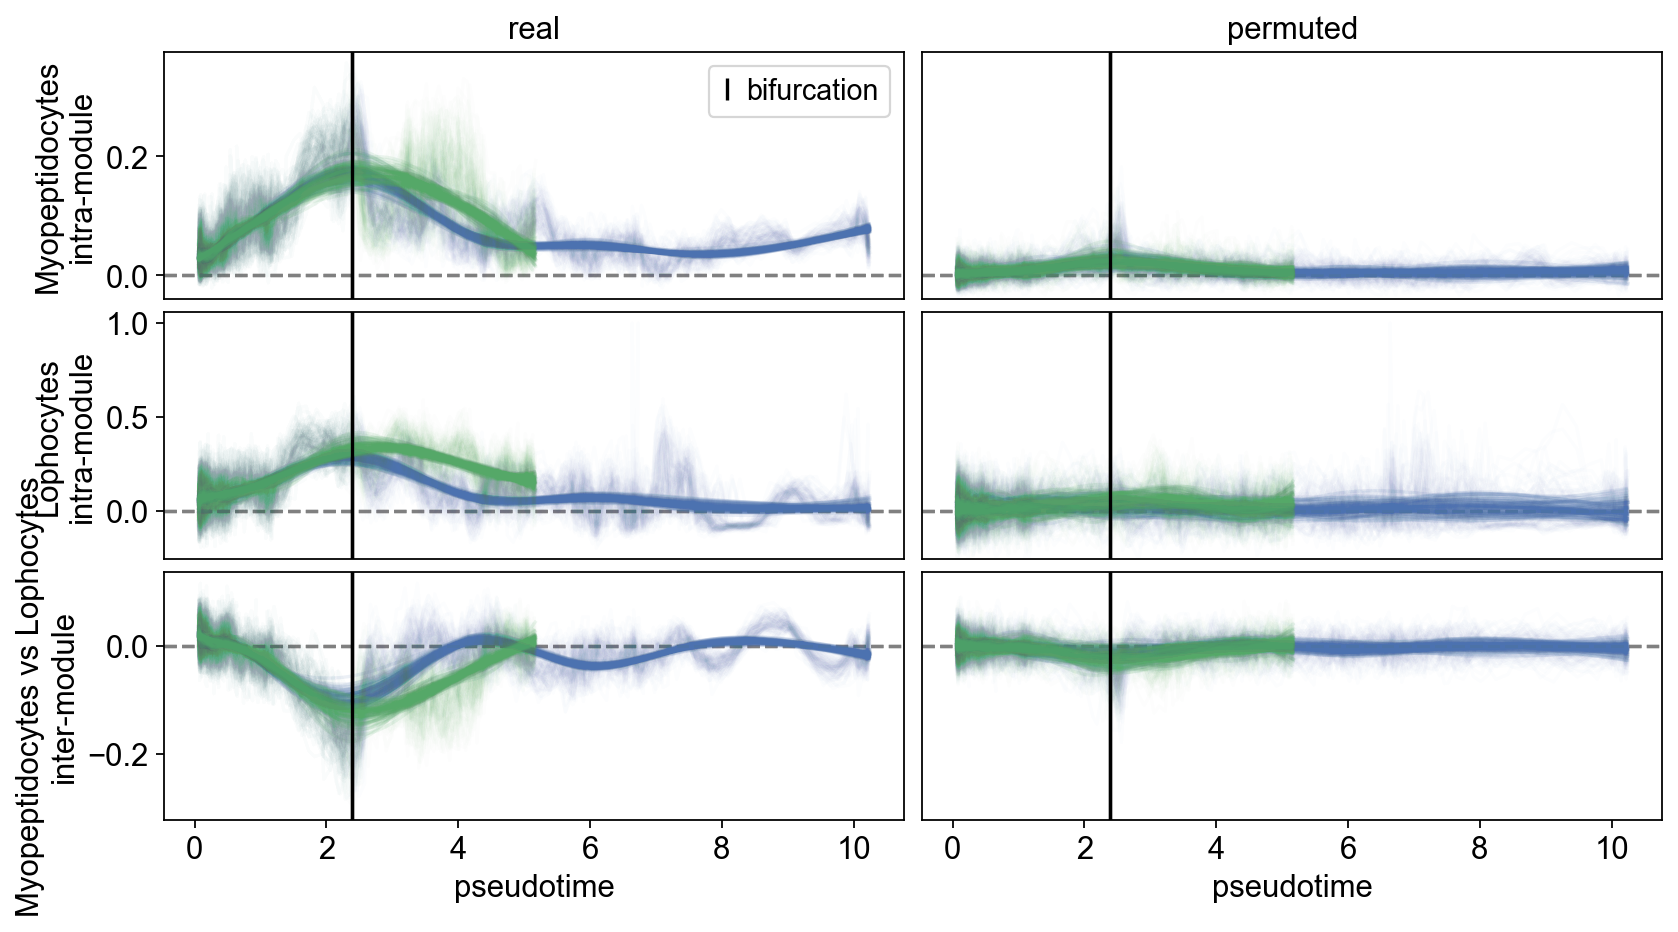

In [100]:
scf.tl.synchro_path(adata,root,miles,w=50,step=15,knots=5,n_jobs=80,n_map=100)
scf.pl.synchro_path(adata,root,miles)

In [103]:
miles=["Choanoblasts","Lophocytes"]

In [42]:
scf.tl.test_fork(adata,root,miles,n_jobs=40,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 3226/3226 [01:17<00:00, 41.83it/s]
    test for upregulation for each leave vs root
    upreg Lophocytes: 100%|██████████| 1619/1619 [00:03<00:00, 455.97it/s]
    finished (0:01:27) --> added 
    .uns['Archaeocytes->Choanoblasts<>Lophocytes']['fork'], DataFrame with fork test results.


In [43]:
scf.tl.branch_specific(adata,root,miles,effect=1)

    branch specific features: Choanoblasts: 107, Lophocytes: 77
    finished --> updated 
    .uns['Archaeocytes->Choanoblasts<>Lophocytes']['fork'], DataFrame updated with additionnal 'branch' column.


In [104]:
scf.tl.activation(adata,root,miles,pseudotime_offset=0,n_jobs=80,n_map=100)

testing activation
    mapping: 100%|██████████| 100/100 [04:22<00:00,  2.62s/it] 
    threshold pseudotime is: 1.486184191093817
    15 early and 92 late features specific to leave Choanoblasts
    3 early and 74 late features specific to leave Lophocytes
    finished (0:04:22) --> updated 
    .uns['Archaeocytes->Choanoblasts<>Lophocytes']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:55<00:00,  1.81it/s]
    finished (0:01:48) --> added 
    .uns['Archaeocytes->Choanoblasts<>Lophocytes']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Archaeocytes->Choanoblasts<>Lophocytes'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


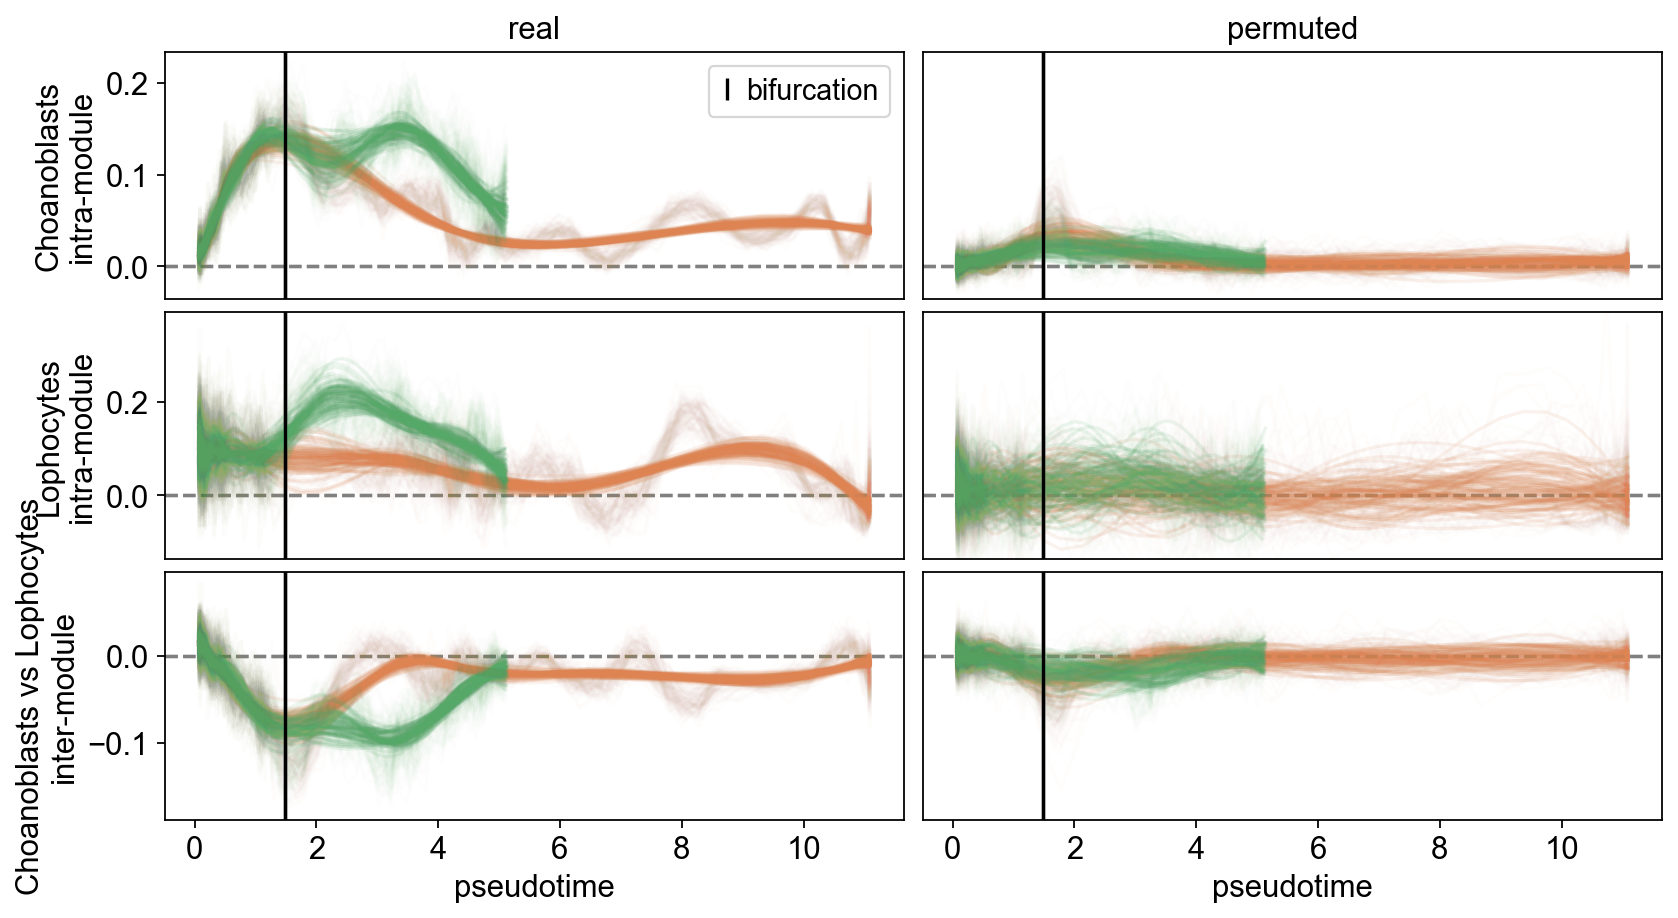

In [105]:
scf.tl.synchro_path(adata,root,miles,w=100,step=30,knots=5,n_jobs=80,n_map=100)
scf.pl.synchro_path(adata,root,miles)

In [187]:
adata.write("adata_final.h5ad")

In [137]:
from matplotlib.colors import LinearSegmentedColormap

cmap_A=LinearSegmentedColormap.from_list("a",["tab:orange","white","grey"])
cmap_B=LinearSegmentedColormap.from_list("a",["tab:blue","white","grey"])

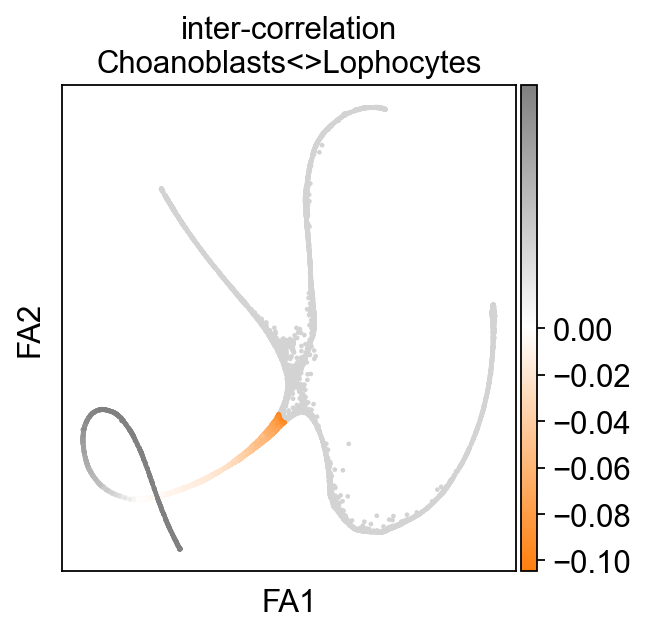

In [136]:
sc.pl.draw_graph(adata,color="inter_cor Archaeocytes->Choanoblasts<>Lophocytes",
                 title="inter-correlation\nChoanoblasts<>Lophocytes",cmap=cmap_A,vcenter=0)

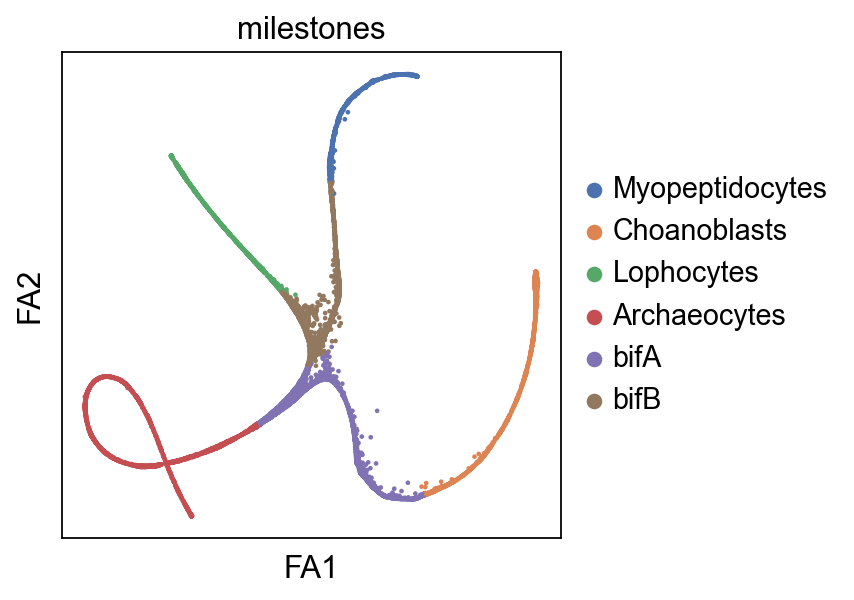

In [147]:
sc.pl.draw_graph(adata,color="milestones")

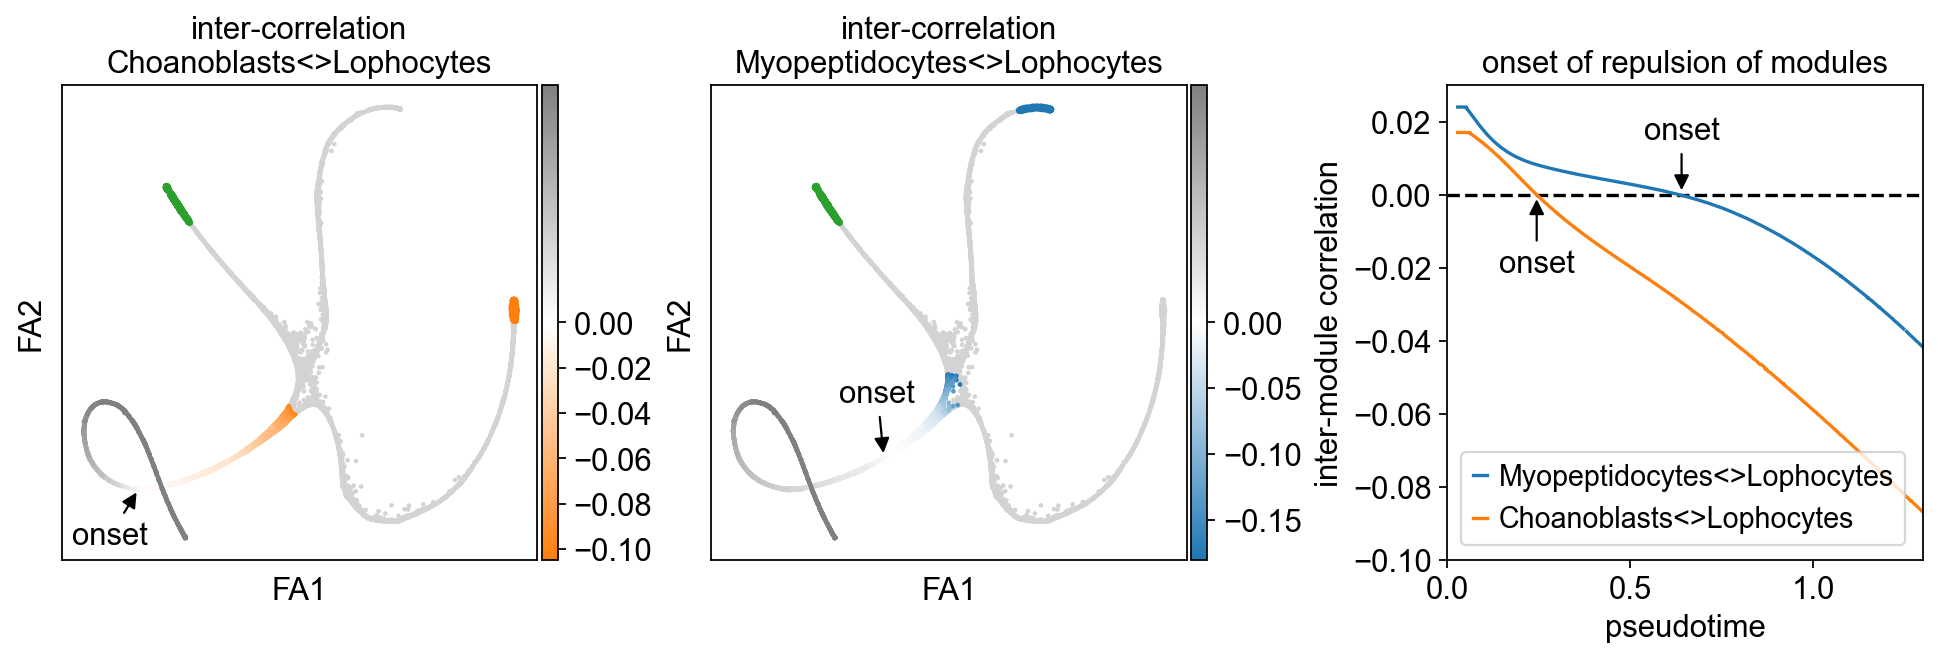

In [186]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4),constrained_layout=True)
tip1=adata.obs.t[adata.obs.milestones=="Myopeptidocytes"].sort_values(ascending=False)[:200].index
tip2=adata.obs.t[adata.obs.milestones=="Lophocytes"].sort_values(ascending=False)[:200].index
tip3=adata.obs.t[adata.obs.milestones=="Choanoblasts"].sort_values(ascending=False)[:200].index


sc.pl.draw_graph(adata,color="inter_cor Archaeocytes->Choanoblasts<>Lophocytes",ax=ax1,
                 title="inter-correlation\nChoanoblasts<>Lophocytes",cmap=cmap_A,vcenter=0,show=False)
ax1.scatter(adata[tip3].obsm["X_draw_graph_fa"][:,0],
           adata[tip3].obsm["X_draw_graph_fa"][:,1],
           c="tab:orange",s=5)

ax1.scatter(adata[tip2].obsm["X_draw_graph_fa"][:,0],
           adata[tip2].obsm["X_draw_graph_fa"][:,1],
           c="tab:green",s=5)

bol=adata.obs["inter_cor Archaeocytes->Choanoblasts<>Lophocytes"][adata.obs.t.sort_values().index]<0
tA=adata.obs.t.sort_values()[np.argwhere(bol.values)[0][0]]
cell_annot=adata.obs.t.sort_values().index[np.argwhere(bol.values)[0][0]]

ax1.annotate("onset",xy=(adata[cell_annot].obsm["X_draw_graph_fa"][:,0],
                      adata[cell_annot].obsm["X_draw_graph_fa"][:,1]),
            xytext=(-30, -25), textcoords='offset points',arrowprops=dict(arrowstyle="-|>", color='black'))

sc.pl.draw_graph(adata,color="inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes",ax=ax2,
                title="inter-correlation\nMyopeptidocytes<>Lophocytes",cmap=cmap_B,vcenter=0,show=False)
ax2.scatter(adata[tip1].obsm["X_draw_graph_fa"][:,0],
           adata[tip1].obsm["X_draw_graph_fa"][:,1],
           c="tab:blue",s=5)

ax2.scatter(adata[tip2].obsm["X_draw_graph_fa"][:,0],
           adata[tip2].obsm["X_draw_graph_fa"][:,1],
           c="tab:green",s=5)

bol=adata.obs["inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes"][adata.obs.t.sort_values().index]<0
tB=adata.obs.t.sort_values()[np.argwhere(bol.values)[0][0]]
cell_annot=adata.obs.t.sort_values().index[np.argwhere(bol.values)[0][0]]

ax2.annotate("onset",xy=(adata[cell_annot].obsm["X_draw_graph_fa"][:,0],
                      adata[cell_annot].obsm["X_draw_graph_fa"][:,1]),
            xytext=(-20, 25), textcoords='offset points',arrowprops=dict(arrowstyle="-|>", color='black'))


import matplotlib.pyplot as plt
sort=adata.obs.t.sort_values().index

ax3.axhline(0,c="k",linestyle="--")
ax3.plot(adata.obs.t[sort],adata.obs["inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes"][sort],
       label="Myopeptidocytes<>Lophocytes")
ax3.plot(adata.obs.t[sort],adata.obs["inter_cor Archaeocytes->Choanoblasts<>Lophocytes"][sort],
       label="Choanoblasts<>Lophocytes")
ax3.set_xlim([0,1.3])
ax3.set_ylim([-.1,0.03])
ax3.legend()
ax3.set_xlabel("pseudotime")
ax3.set_ylabel("inter-module correlation")

ax3.annotate("onset",xy=(tA,0),xytext=(0, -35),ha="center",
             textcoords='offset points',arrowprops=dict(arrowstyle="-|>", color='black'))

ax3.annotate("onset",xy=(tB,0),xytext=(0, 25),ha="center",
             textcoords='offset points',arrowprops=dict(arrowstyle="-|>", color='black'))

ax3.set_title("onset of repulsion of modules");

0.24489447426417402

Text(0, 0.5, 'inter-module correlation')

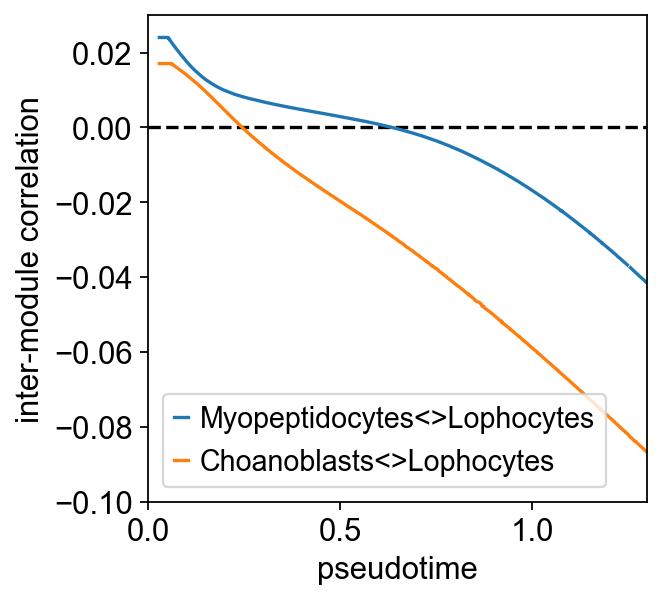

In [109]:
import numpy as np


0.24489447426417402

In [94]:
bol=adata.obs["inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes"][adata.obs.t.sort_values().index]<0
adata.obs.t.sort_values()[np.argwhere(bol.values)[0][0]]

0.5937361940268587

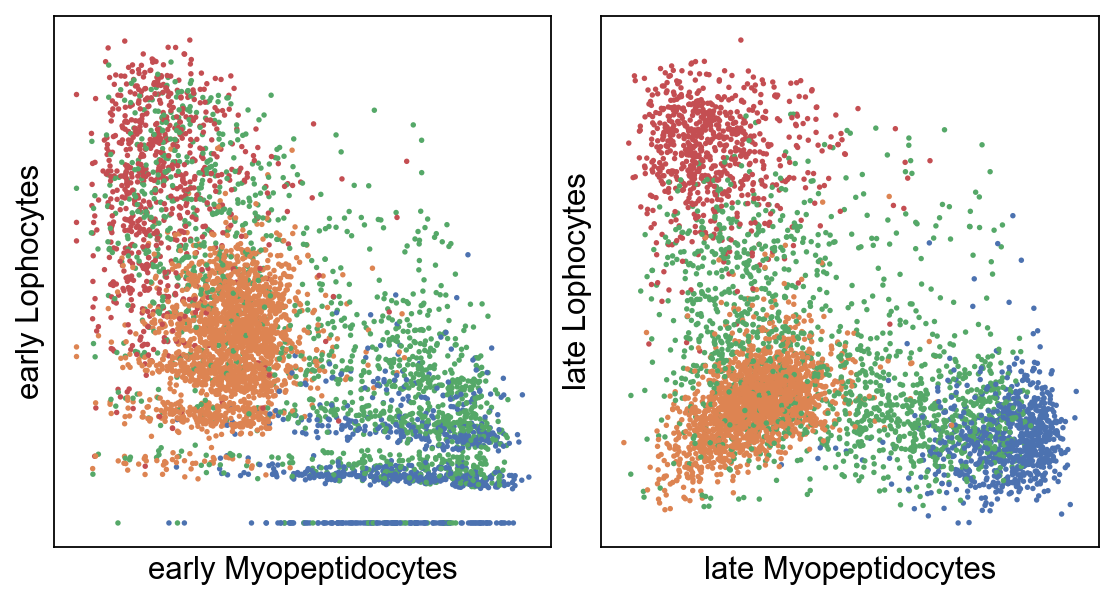

In [9]:
sc.set_figure_params()
scf.pl.modules(adata,root,miles)

In [10]:
scf.tl.slide_cells(adata,root,miles,win=300)

--> added 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['cell_freq'], probability assignment of cells on 17 non intersecting windows.


In [11]:
scf.tl.slide_cors(adata,root,miles)

--> added 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['corAB'], gene-gene correlation modules.


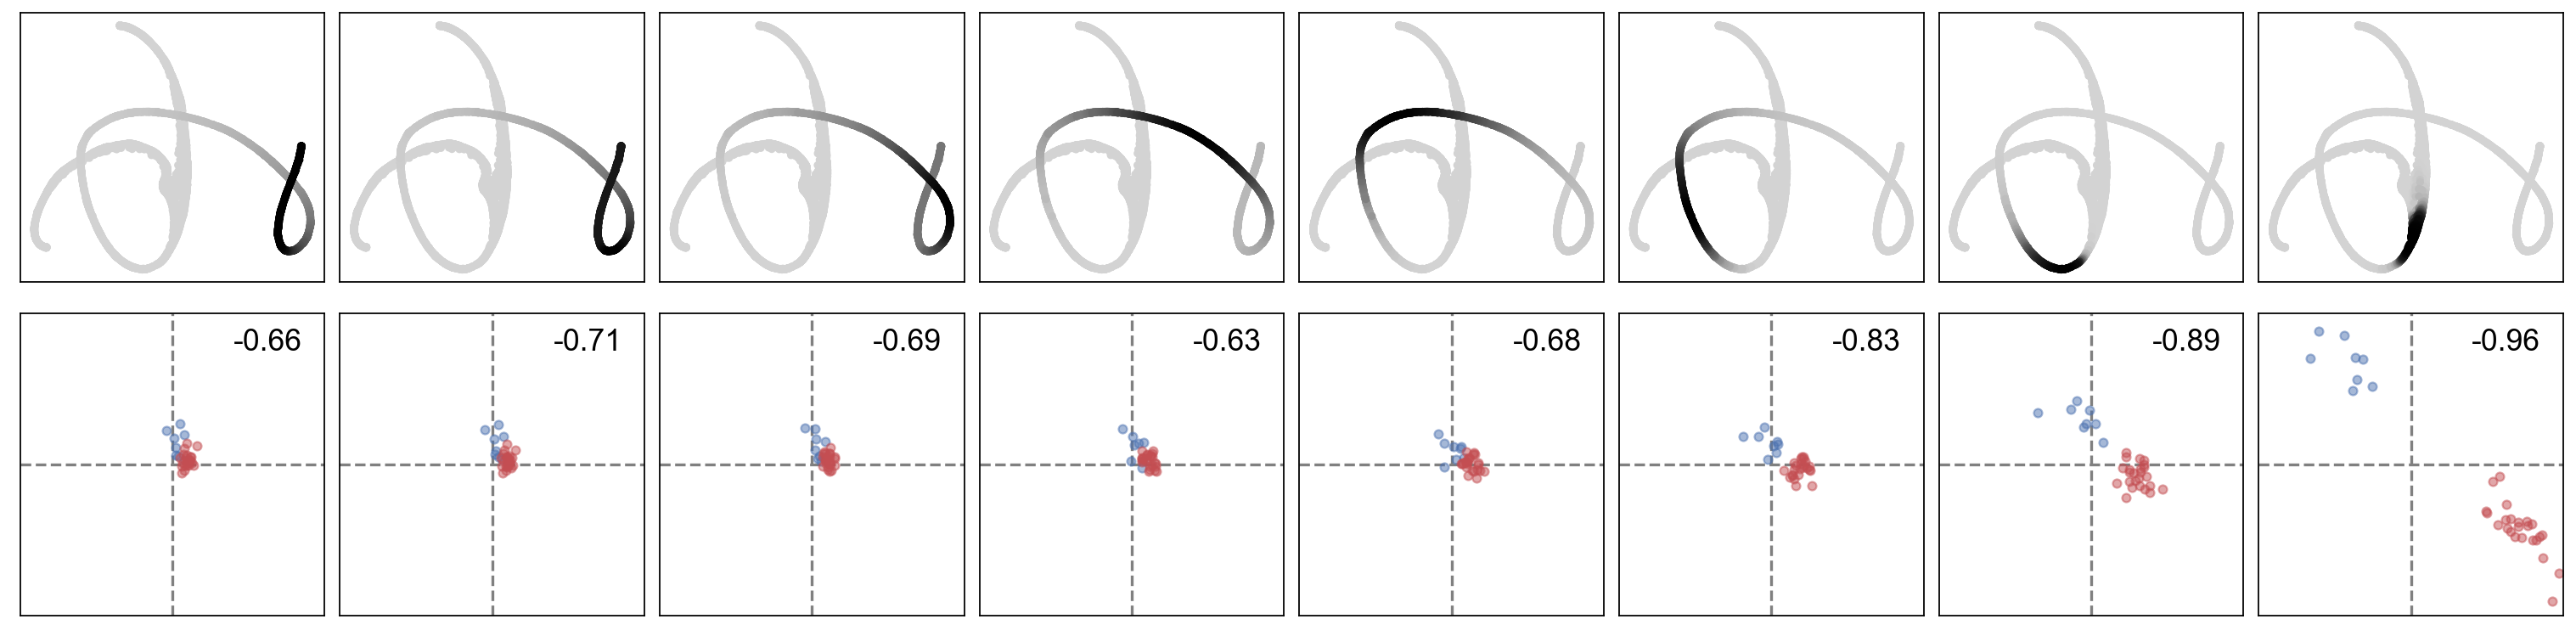

In [12]:
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=range(0,8))

In [13]:
scf.tl.synchro_path(adata,root,miles,w=50,step=15,n_jobs=1,n_map=1,do_loess=False)

computing local correlations
    single mapping
    to Lophocytes: 100%|██████████| 217/217 [00:03<00:00, 70.58it/s]
    finished (0:00:15) --> added 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes'], loess fit of inter-module mean local gene-gene correlations prior to bifurcation.


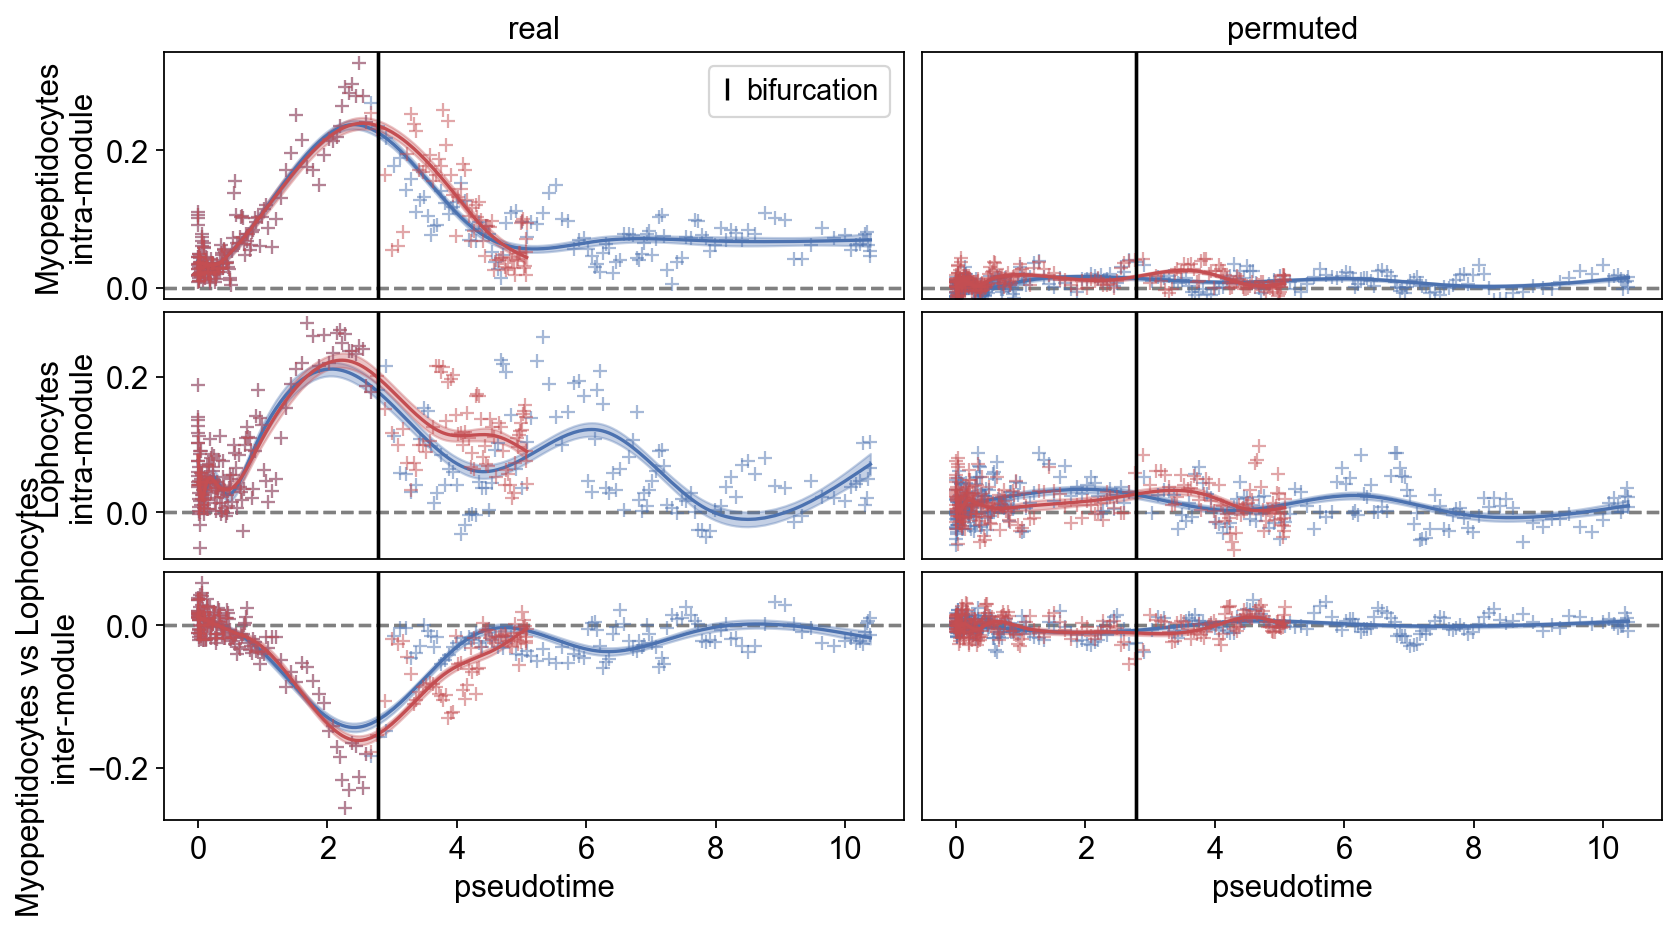

In [14]:
scf.pl.synchro_path(adata,root,miles)

In [15]:
scf.tl.synchro_path(adata,root,miles,w=50,step=15,n_jobs=40,n_map=100)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s]
    finished (0:02:12) --> added 
    .uns['Archaeocytes->Myopeptidocytes<>Lophocytes']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes'], loess fit of inter-module mean local gene-gene correlations prior to bifurcation.


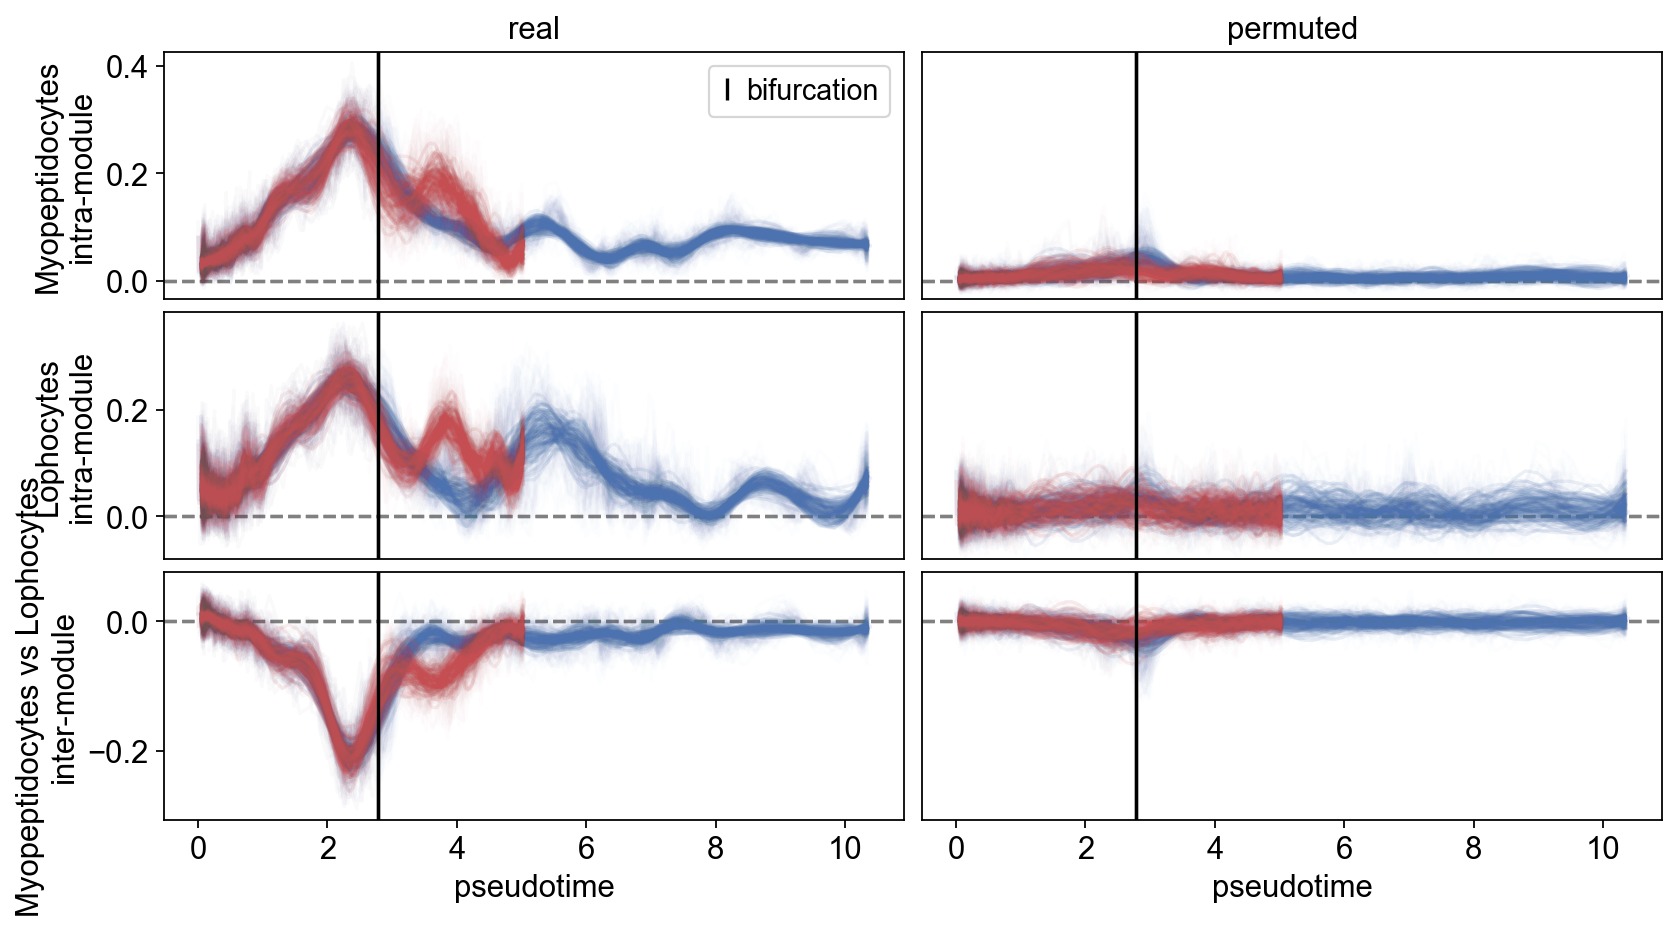

In [17]:
scf.pl.synchro_path(adata,root,miles,knots=30)

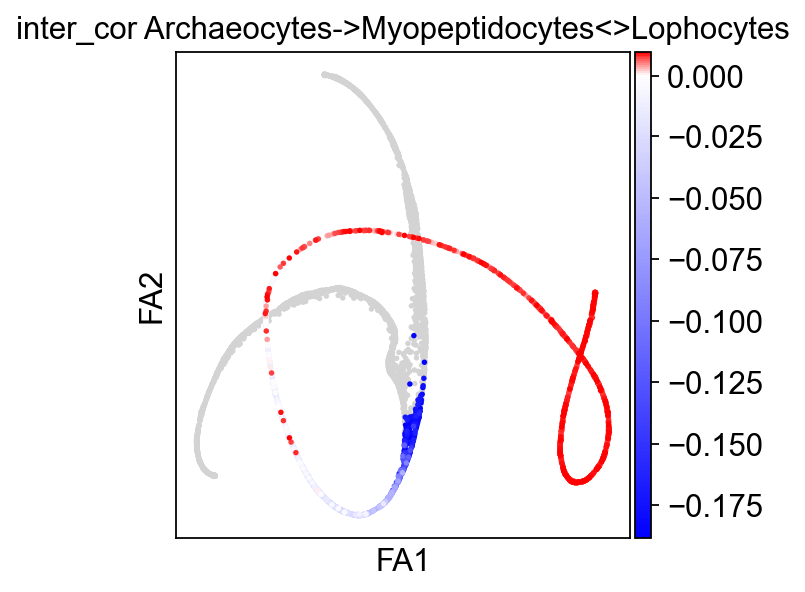

In [21]:
sc.pl.draw_graph(adata,color="inter_cor Archaeocytes->Myopeptidocytes<>Lophocytes",cmap="bwr",vcenter=0)

In [18]:
adata.write("adata_final.h5ad")